### Import major libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib
import numpy as np
import sklearn   # scikit-learn

In [ ]:
print (tf.__version__)
print (keras.__version__)
print (pd.__version__)
print (matplotlib.__version__)
print (np.__version__)
print (sklearn.__version__)

In [1]:
from datetime import datetime, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline

# Description of Original Datasets

### one-minute data saved in one-day excel files

In [5]:
import os
#os.chdir ('C:\\Users\\Abraham\\Desktop\\IEEE\\material\\data')
sample_dataset = pd.read_excel('2017041.xlsx')#, skiprows=(1))  # April 1st 2017 consumption data
sample_dataset.head()

,Unnamed: 0,709200014,709200058,709200059,709200060,709200061,709200062,709200063,709200064,709200015,...,709200074,709200075,709200076,709200077,709200050,709200051,709200078,709200079,709200080,709200057
0,NaT,引込盤 電力量(電灯 WHM-001)(仮想),引込盤 1N線間電圧(電灯 WHM-001)(仮想),引込盤 2N線間電圧(電灯 WHM-001)(仮想),引込盤 12線間電圧(電灯 WHM-001)(仮想),引込盤 1相電流(電灯 WHM-001)(仮想),引込盤 N相電流(電灯 WHM-001)(仮想),引込盤 2相電流(電灯 WHM-001)(仮想),引込盤 電力(電灯 WHM-001)(仮想),引込盤 電力量(動力 WHM-002)(仮想),...,蓄電システム PV電力(仮想),蓄電システム 外気温(仮想),蓄電システム 日射量(仮想),蓄電システム 蓄電池残量(仮想),蓄電システム 積算電力量（放電）(仮想),蓄電システム 積算電力量（充電）(仮想),入力電力(仮想),出力電力(仮想),充放電電力(仮想),PV接続盤 発電電力量(仮想)
1,NaT,kWh,V,V,V,A,A,A,kW,kWh,...,kW,℃,W/m2,%,kWh,kWh,kW,kW,kW,Wh
2,2017-04-01 00:00:00,0.058,103.6,103.8,207.4,21,5,18.5,3.3,0.029,...,-0.01,10.2,0,100,0,0.000666667,1.1,0.6,-0.05,0
3,2017-04-01 00:01:00,0.057,103.4,103.6,207,20.5,4.5,19.5,3.4,0.029,...,-0.01,10.2,0,100,0,0.000666667,1.09,0.61,-0.02,0
4,2017-04-01 00:02:00,0.062,103.6,103.7,207.2,20.5,5,22,3.55,0.029,...,-0.01,10.2,0,100,0,0.000666667,1.1,0.6,-0.05,0


## The following were done in Microsoft excel;

### The Energy consumption data (kWh) and temperature was extracted, 
### It was converted to hourly data,
### All daily excel files were concantated into one file
### National and company holiday data was added to the new datset

In [2]:
pwd

'C:\\Users\\Abraham\\Desktop\\chapters1\\material'

In [3]:
import os
os.chdir ('C:\\Users\\Abraham\\Desktop\\chapters1\\material\\data')

xls = pd.ExcelFile('kyushu_hour_data.xlsx')   
df = pd.read_excel(xls, 'year_hourly', skiprows=1)  # access specific sheet

df.head()

,Date_time,Hourly Consumption data (kWh),Temperature (C),National Holidays
0,2017-04-01 00:00:00,2.52,8.8,1
1,2017-04-01 01:00:00,2.51,8.6,1
2,2017-04-01 02:00:00,2.48,8.2,1
3,2017-04-01 03:00:00,2.56,8.1,1
4,2017-04-01 04:00:00,2.58,7.4,1


In [6]:
df.tail()   # check last row index

,Date_time,Hourly Consumption data (kWh),Temperature (C),National Holidays
8755,2018-03-31 18:59:59.998,3.14,16.6,1
8756,2018-03-31 19:59:59.998,3.14,17.1,1
8757,2018-03-31 20:59:59.998,3.07,16.4,1
8758,2018-03-31 21:59:59.998,3.07,16.1,1
8759,2018-03-31 22:59:59.998,3.03,16.0,1


# Let's follow this flowchart

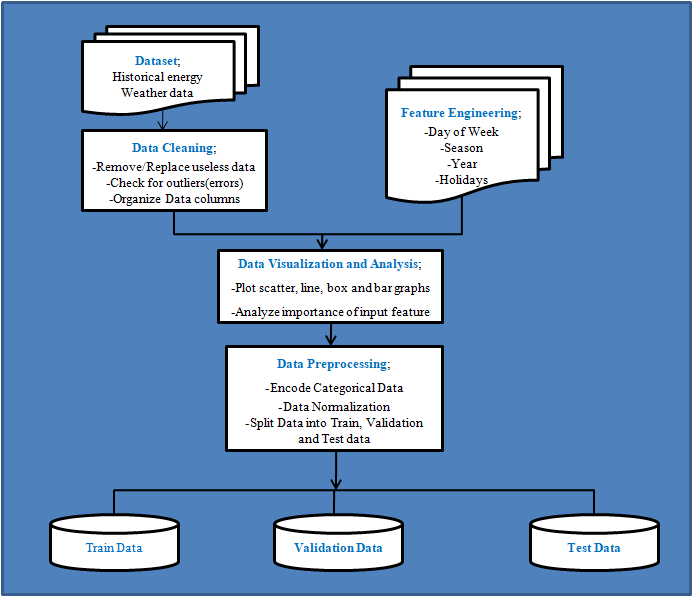

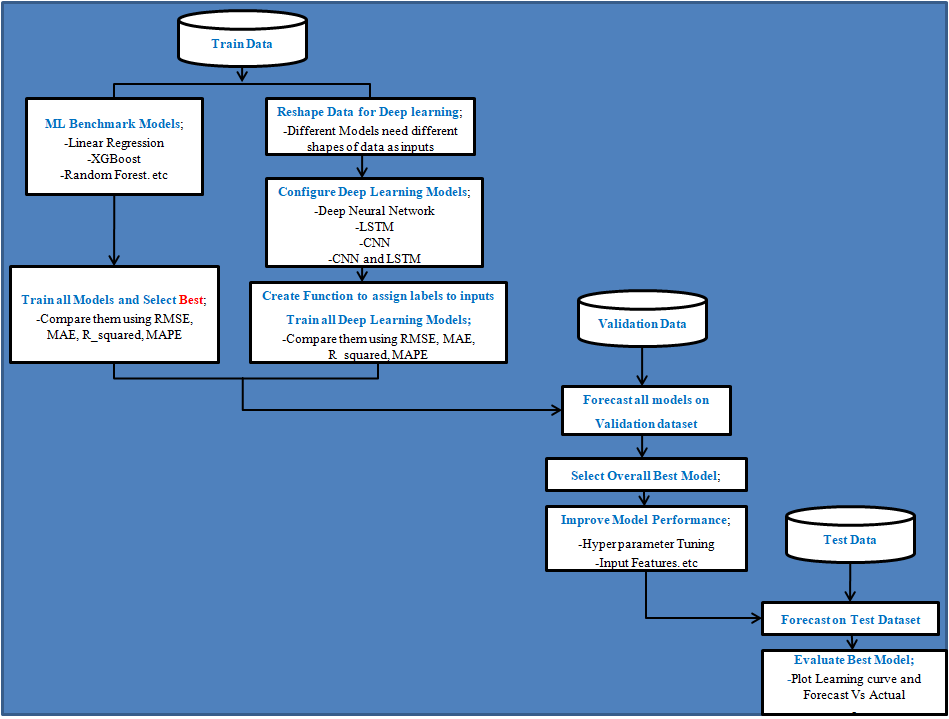

## Energy consumption BOX plot

No handles with labels found to put in legend.


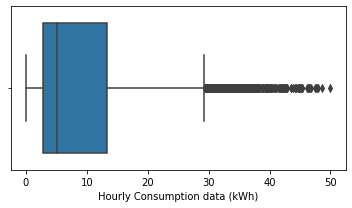

In [10]:
plt.figure(figsize=(5,3))
sns.boxplot(x  = df['Hourly Consumption data (kWh)'])
#plt.title('Energy Consumption')
plt.tight_layout() 
plt.legend().set_visible(False)
#plt.savefig('energy_boxplot.png', dpi=300)

# Step 1: Data cleaning

### Any missing values?

In [4]:
df.isnull().sum()   # total number of missing values per column. NONE!

Date_time                        0
Hourly Consumption data (kWh)    0
Temperature (C)                  0
National Holidays                0
dtype: int64

In [90]:
df.dtypes

Date_time                        datetime64[ns]
Hourly Consumption data (kWh)           float64
Temperature (C)                         float64
National Holidays                         int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
Date_time                        8760 non-null datetime64[ns]
Hourly Consumption data (kWh)    8760 non-null float64
Temperature (C)                  8760 non-null float64
National Holidays                8760 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.8 KB


### Data Statistics. Any missing or outliers??

In [92]:
df['Hourly Consumption data (kWh)'].describe().transpose()

#sns.distplot(df['Hourly Consumption data (kWh)'])

count    8760.000000
mean        9.562746
std         8.971699
min         0.000000
25%         2.760000
50%         5.100000
75%        13.380000
max        49.980000
Name: Hourly Consumption data (kWh), dtype: float64

## Add input out features

In [1]:
#df['year'] = df['Date_time'].apply(lambda x: x.year)
df["Day_of_week"] = df['Date_time'].apply(lambda x: 0 if x.dayofweek > 4 else 1 )  # week day = 0 to 4 , weekend = 5 and 6
df['month'] = df['Date_time'].apply(lambda x: x.month)
df['day'] = df['Date_time'].apply(lambda x: x.day)


NameError: name 'df' is not defined

In [7]:
df.set_index('Date_time', inplace =True)   # Set DateTime as index

In [8]:
df.head()

,Hourly Consumption data (kWh),Temperature (C),National Holidays,Day_of_week,month,day
Date_time,,,,,,
2017-04-01 00:00:00,2.52,8.8,1,0,4,1
2017-04-01 01:00:00,2.51,8.6,1,0,4,1
2017-04-01 02:00:00,2.48,8.2,1,0,4,1
2017-04-01 03:00:00,2.56,8.1,1,0,4,1
2017-04-01 04:00:00,2.58,7.4,1,0,4,1


## Working Time. 6am to 8pm

In [9]:
working_hrs = df.between_time(time(6, 0), time(20, 0))
Not_working_hrs = df.between_time(time(20, 0), time(6, 0))

In [10]:
working_hrs.head(20)

,Hourly Consumption data (kWh),Temperature (C),National Holidays,Day_of_week,month,day
Date_time,,,,,,
2017-04-01 06:00:00,23.81,7.6,1,0,4,1
2017-04-01 07:00:00,10.07,8.5,1,0,4,1
2017-04-01 08:00:00,9.30,9.9,1,0,4,1
2017-04-01 09:00:00,9.08,12.3,1,0,4,1
2017-04-01 10:00:00,9.53,13.2,1,0,4,1
2017-04-01 11:00:00,8.86,13.6,1,0,4,1
2017-04-01 12:00:00,7.06,15.0,1,0,4,1
2017-04-01 13:00:00,8.92,13.9,1,0,4,1
2017-04-01 14:00:00,8.54,13.5,1,0,4,1


In [11]:
Not_working_hrs.head(10)

,Hourly Consumption data (kWh),Temperature (C),National Holidays,Day_of_week,month,day
Date_time,,,,,,
2017-04-01 00:00:00,2.52,8.8,1,0,4,1
2017-04-01 01:00:00,2.51,8.6,1,0,4,1
2017-04-01 02:00:00,2.48,8.2,1,0,4,1
2017-04-01 03:00:00,2.56,8.1,1,0,4,1
2017-04-01 04:00:00,2.58,7.4,1,0,4,1
2017-04-01 05:00:00,10.84,7.5,1,0,4,1
2017-04-01 06:00:00,23.81,7.6,1,0,4,1
2017-04-01 20:00:00,2.73,12.0,1,0,4,1
2017-04-01 21:00:00,2.61,10.3,1,0,4,1


In [12]:
working_hrs['working_time'] = working_hrs.index.map(lambda x: 1 )
Not_working_hrs['working_time'] = Not_working_hrs.index.map(lambda x: 0 )

C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
Not_working_hrs.head()

,Hourly Consumption data (kWh),Temperature (C),National Holidays,Day_of_week,month,day,working_time
Date_time,,,,,,,
2017-04-01 00:00:00,2.52,8.8,1,0,4,1,0
2017-04-01 01:00:00,2.51,8.6,1,0,4,1,0
2017-04-01 02:00:00,2.48,8.2,1,0,4,1,0
2017-04-01 03:00:00,2.56,8.1,1,0,4,1,0
2017-04-01 04:00:00,2.58,7.4,1,0,4,1,0


In [14]:
 df1 = pd.concat([working_hrs,Not_working_hrs])

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8959 entries, 2017-04-01 06:00:00 to 2018-03-31 22:59:59.998000
Data columns (total 7 columns):
Hourly Consumption data (kWh)    8959 non-null float64
Temperature (C)                  8959 non-null float64
National Holidays                8959 non-null int64
Day_of_week                      8959 non-null int64
month                            8959 non-null int64
day                              8959 non-null int64
working_time                     8959 non-null int64
dtypes: float64(2), int64(5)
memory usage: 559.9 KB


In [16]:
df1.head()

,Hourly Consumption data (kWh),Temperature (C),National Holidays,Day_of_week,month,day,working_time
Date_time,,,,,,,
2017-04-01 06:00:00,23.81,7.6,1,0,4,1,1
2017-04-01 07:00:00,10.07,8.5,1,0,4,1,1
2017-04-01 08:00:00,9.30,9.9,1,0,4,1,1
2017-04-01 09:00:00,9.08,12.3,1,0,4,1,1
2017-04-01 10:00:00,9.53,13.2,1,0,4,1,1


In [17]:
df1.reset_index(inplace=True)

In [18]:
df1.drop_duplicates(subset= ["Date_time"],inplace = True)  # w.r.t Date time column

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8958
Data columns (total 8 columns):
Date_time                        8760 non-null datetime64[ns]
Hourly Consumption data (kWh)    8760 non-null float64
Temperature (C)                  8760 non-null float64
National Holidays                8760 non-null int64
Day_of_week                      8760 non-null int64
month                            8760 non-null int64
day                              8760 non-null int64
working_time                     8760 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 615.9 KB


In [21]:
df1.head(50)

,Date_time,Hourly Consumption data (kWh),Temperature (C),National Holidays,Day_of_week,month,day,working_time
0,2017-04-01 06:00:00,23.81,7.6,1,0,4,1,1
1,2017-04-01 07:00:00,10.07,8.5,1,0,4,1,1
2,2017-04-01 08:00:00,9.30,9.9,1,0,4,1,1
3,2017-04-01 09:00:00,9.08,12.3,1,0,4,1,1
4,2017-04-01 10:00:00,9.53,13.2,1,0,4,1,1
5,2017-04-01 11:00:00,8.86,13.6,1,0,4,1,1
6,2017-04-01 12:00:00,7.06,15.0,1,0,4,1,1
7,2017-04-01 13:00:00,8.92,13.9,1,0,4,1,1
8,2017-04-01 14:00:00,8.54,13.5,1,0,4,1,1
9,2017-04-01 15:00:00,7.74,13.6,1,0,4,1,1


In [22]:
df1.set_index('Date_time',inplace=True)

In [23]:
df1.sort_index(inplace =True)

In [24]:
df1.head(50)

,Hourly Consumption data (kWh),Temperature (C),National Holidays,Day_of_week,month,day,working_time
Date_time,,,,,,,
2017-04-01 00:00:00,2.52,8.8,1,0,4,1,0
2017-04-01 01:00:00,2.51,8.6,1,0,4,1,0
2017-04-01 02:00:00,2.48,8.2,1,0,4,1,0
2017-04-01 03:00:00,2.56,8.1,1,0,4,1,0
2017-04-01 04:00:00,2.58,7.4,1,0,4,1,0
2017-04-01 05:00:00,10.84,7.5,1,0,4,1,0
2017-04-01 06:00:00,23.81,7.6,1,0,4,1,1
2017-04-01 07:00:00,10.07,8.5,1,0,4,1,1
2017-04-01 08:00:00,9.30,9.9,1,0,4,1,1


In [25]:
#df1.drop("index", axis =1, inplace=True)

In [26]:
df1.tail(24)

,Hourly Consumption data (kWh),Temperature (C),National Holidays,Day_of_week,month,day,working_time
Date_time,,,,,,,
2018-03-30 23:59:59.998,4.87,12.5,1,1,3,30,0
2018-03-31 00:59:59.998,4.38,11.8,1,0,3,31,0
2018-03-31 01:59:59.998,4.37,11.7,1,0,3,31,0
2018-03-31 02:59:59.998,3.07,11.9,1,0,3,31,0
2018-03-31 03:59:59.998,2.97,11.0,1,0,3,31,0
2018-03-31 04:59:59.998,3.03,10.2,1,0,3,31,0
2018-03-31 05:59:59.998,10.01,11.0,1,0,3,31,0
2018-03-31 06:59:59.998,6.45,13.3,1,0,3,31,1
2018-03-31 07:59:59.998,7.65,15.8,1,0,3,31,1


In [ ]:
df.head()

## Make a timeseries interactive plot for visualization.

In [ ]:
#df.set_index('DateTime', inplace =True)   # Set DateTime as index

In [27]:
dfT = df1.loc[:,['Hourly Consumption data (kWh)']]  # lock Consumpution Column

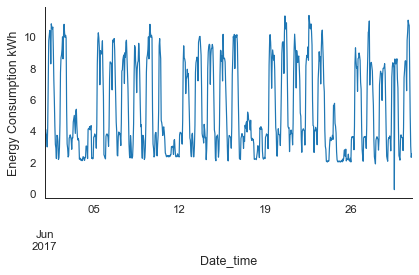

In [23]:
dfT1=dfT[(dfT.index>='2017-06-01') & (dfT.index<'2017-07-01')]  # Only June

sns.set_style('white')
sns.set_context("paper", font_scale=1.3)   

dfT1.plot(figsize=(6,4));

plt.ylabel('Energy Consumption kWh')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
#plt.savefig('timeseries_june.png', dpi=300) 
plt.show() 

## Timeseries plot

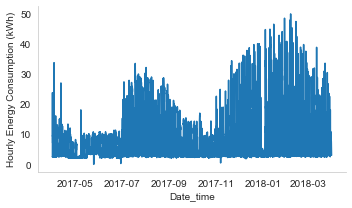

In [16]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(5,3))
#fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(1,1,1)
ax1.plot(df['Hourly Consumption data (kWh)'].resample('h').mean())
#ax1.set_title('Average Consumption by Day')
ax1.set_ylabel('Hourly Energy Consumption (kWh)')
ax1.set_xlabel('Date_time')
#ax1.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
sns.despine(top=True)
#plt.savefig('timeseries_plot.png', dpi=300) 
#plt.show()

## Average consumption by Day

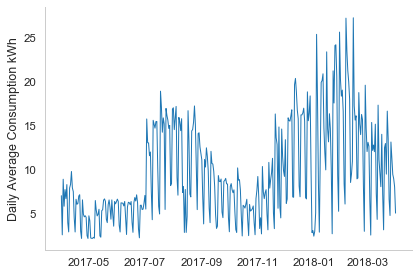

In [115]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(6,4))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(1,1,1)
ax1.plot(dfT['Hourly Consumption data (kWh)'].resample('D').mean(),linewidth=1)
#ax1.set_title('Average Consumption by Day')
ax1.set_ylabel('Daily Average Consumption kWh')
#ax1.set_xlabel('Day ', fontsize=14)
#ax1.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
sns.despine(top=True)
#plt.savefig('timeseries_dailyMean.png', dpi=300) 
#plt.show()

### Energy Conspumtion Distribution Plot

count    8760.000000
mean        9.562746
std         8.971699
min         0.000000
25%         2.760000
50%         5.100000
75%        13.380000
max        49.980000
Name: Hourly Consumption data (kWh), dtype: float64

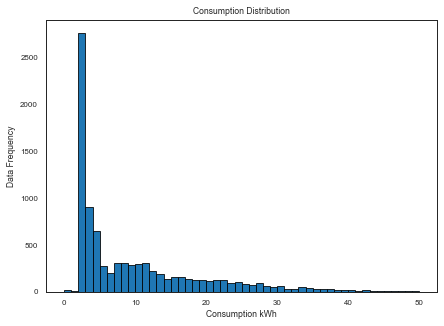

In [331]:

plt.figure(figsize=(7,5))
plt.subplot(1,1,1)
df['Hourly Consumption data (kWh)'].hist(bins=50,edgecolor='black', grid=False)
plt.title('Consumption Distribution')
plt.ylabel('Data Frequency')
plt.xlabel('Consumption kWh')
#plt.savefig('Consup_Distribution.png', dpi=300) 
#plt.show()

x = df['Hourly Consumption data (kWh)'].describe()
x.transpose()

### Low consumption every night, weekends , Sping and Autumn explains the distibution plot shape

## Add Season column to the dataframe

In [28]:
df1["season"] = df1.index.map(lambda x: 1 if x.month < 3  else 2 if x.month < 6 else 3 if x.month < 9 else 4 if x.month < 12 else 1)

In [29]:
df1.head()

,Hourly Consumption data (kWh),Temperature (C),National Holidays,Day_of_week,month,day,working_time,season
Date_time,,,,,,,,
2017-04-01 00:00:00,2.52,8.8,1,0,4,1,0,2
2017-04-01 01:00:00,2.51,8.6,1,0,4,1,0,2
2017-04-01 02:00:00,2.48,8.2,1,0,4,1,0,2
2017-04-01 03:00:00,2.56,8.1,1,0,4,1,0,2
2017-04-01 04:00:00,2.58,7.4,1,0,4,1,0,2


### Since time series has no general trend, upward or downward. The regression line can then not be used as a prediction of the long run movement of the time series.

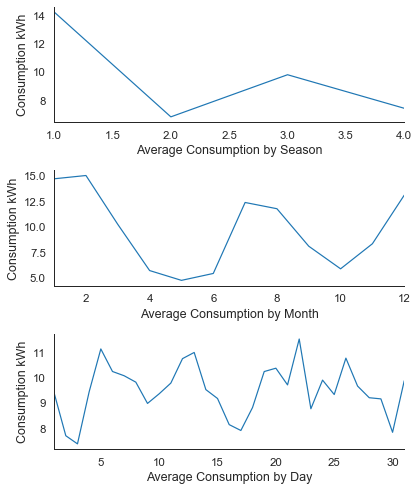

In [148]:
plt.figure(figsize=(6,7))
plt.subplot(3,1,1)
df1.groupby('season')['Hourly Consumption data (kWh)'].agg('mean').plot();
plt.xlabel('Average Consumption by Season');
plt.ylabel('Consumption kWh')

plt.subplot(3,1,2)
df1.groupby('month')['Hourly Consumption data (kWh)'].agg('mean').plot();
plt.xlabel('Average Consumption by Month');
plt.ylabel('Consumption kWh')

plt.subplot(3,1,3)
df1.groupby('day')['Hourly Consumption data (kWh)'].agg('mean').plot();
plt.xlabel('Average Consumption by Day');

plt.ylabel('Consumption kWh')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
#plt.savefig('season_month_day_mean.png', dpi=300) 
#plt.show() 

## Filter Working hors from Weekend

In [31]:
working_hours = working_hrs[working_hrs['Day_of_week'] == 1]   # remove weekend data. Filter Day_of_kwee column

In [32]:
working_hours.head()

,Hourly Consumption data (kWh),Temperature (C),National Holidays,Day_of_week,month,day,working_time
Date_time,,,,,,,
2017-04-03 06:00:00,31.84,6.0,1,1,4,3,1
2017-04-03 07:00:00,33.77,8.0,1,1,4,3,1
2017-04-03 08:00:00,16.89,11.2,1,1,4,3,1
2017-04-03 09:00:00,9.31,13.6,1,1,4,3,1
2017-04-03 10:00:00,7.36,16.5,1,1,4,3,1


In [33]:
working_hours.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3710 entries, 2017-04-03 06:00:00 to 2018-03-30 19:59:59.998000
Data columns (total 7 columns):
Hourly Consumption data (kWh)    3710 non-null float64
Temperature (C)                  3710 non-null float64
National Holidays                3710 non-null int64
Day_of_week                      3710 non-null int64
month                            3710 non-null int64
day                              3710 non-null int64
working_time                     3710 non-null int64
dtypes: float64(2), int64(5)
memory usage: 231.9 KB


In [34]:
working_hours_Not_holiday = working_hours[working_hours['National Holidays'] == 1] # remove holidays.Filter Holiday col  

In [35]:
working_hours_Not_holiday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3455 entries, 2017-04-03 06:00:00 to 2018-03-30 19:59:59.998000
Data columns (total 7 columns):
Hourly Consumption data (kWh)    3455 non-null float64
Temperature (C)                  3455 non-null float64
National Holidays                3455 non-null int64
Day_of_week                      3455 non-null int64
month                            3455 non-null int64
day                              3455 non-null int64
working_time                     3455 non-null int64
dtypes: float64(2), int64(5)
memory usage: 215.9 KB


### Resample and plot scatter graph # We need a plot for Temp when Energy is being Consumed

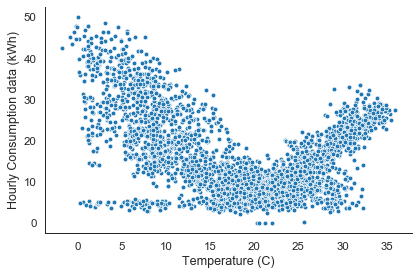

In [37]:

sns.scatterplot(x="Temperature (C)", y="Hourly Consumption data (kWh)", data=working_hours_Not_holiday)
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)   

plt.tight_layout()
sns.despine(top=True)
plt.savefig('Consp_Temp_scatter.png', dpi=300) 
plt.show() 

In [38]:
df1.head()

,Hourly Consumption data (kWh),Temperature (C),National Holidays,Day_of_week,month,day,working_time,season
Date_time,,,,,,,,
2017-04-01 00:00:00,2.52,8.8,1,0,4,1,0,2
2017-04-01 01:00:00,2.51,8.6,1,0,4,1,0,2
2017-04-01 02:00:00,2.48,8.2,1,0,4,1,0,2
2017-04-01 03:00:00,2.56,8.1,1,0,4,1,0,2
2017-04-01 04:00:00,2.58,7.4,1,0,4,1,0,2


## Make box plots for power demand vs input features

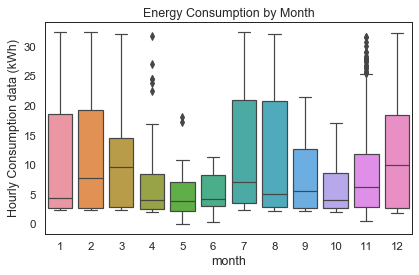

In [40]:
q = df1['Hourly Consumption data (kWh)'].quantile(0.97)   # Neglect extreme outliers
dfq=df1[df1['Hourly Consumption data (kWh)'] < q]

plt.figure(figsize=(6,4))
sns.boxplot(x = dfq['month'],y = dfq['Hourly Consumption data (kWh)'])
plt.title('Energy Consumption by Month')
plt.tight_layout()                                                                                                                  
#plt.legend().set_visible(False)
#plt.savefig('box_by_month.png', dpi=300)

C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


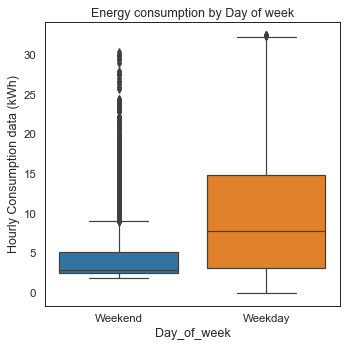

In [44]:
q = df1['Hourly Consumption data (kWh)'].quantile(0.97)   # Neglect extreme outliers
dfq=df1[df1['Hourly Consumption data (kWh)'] < q]

dic={1:'Weekday',0:'Weekend'}
dfq['Day_of_week'] = dfq.Day_of_week.map(dic)

plt.figure(figsize=(5,5))
sns.boxplot(x = dfq['Day_of_week'],y = dfq['Hourly Consumption data (kWh)'])
plt.title('Energy consumption by Day of week')
plt.tight_layout()                                                                                                                  
#plt.legend().set_visible(False)
#plt.savefig('box_by_weekday.png', dpi=300)

C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


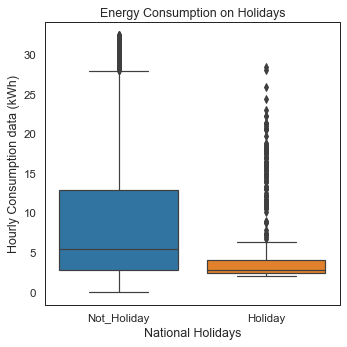

In [42]:
q = df1['Hourly Consumption data (kWh)'].quantile(0.97)   # Neglect extreme outliers
dfq=df1[df1['Hourly Consumption data (kWh)'] < q]

dic={1:'Not_Holiday',0:'Holiday'}
dfq['National Holidays'] = dfq['National Holidays'].map(dic)

plt.figure(figsize=(5,5))
sns.boxplot(x = dfq['National Holidays'],y = dfq['Hourly Consumption data (kWh)'])
plt.title('Energy Consumption on Holidays')
plt.tight_layout()                                                                                                                  
#plt.legend().set_visible(False)
#plt.savefig('box_by_holiday.png', dpi=300)

C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


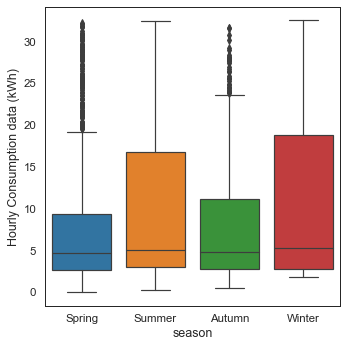

In [43]:
q = df1['Hourly Consumption data (kWh)'].quantile(0.97)   # Neglect extreme outliers
dfq=df1[df1['Hourly Consumption data (kWh)'] < q]

dic={1:'Winter',2:'Spring',3:'Summer',4:'Autumn'}
dfq['season'] = dfq.season.map(dic)

plt.figure(figsize=(5,5))
sns.boxplot(x = dfq['season'],y = dfq['Hourly Consumption data (kWh)'])
#plt.title('Weekday Vs Weekend Energy demand')
plt.tight_layout()                                                                                                                  
#plt.legend().set_visible(False)
#plt.savefig('box_by_season.png', dpi=300)

C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


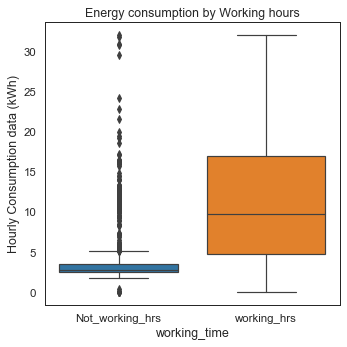

In [167]:
q = df1['Hourly Consumption data (kWh)'].quantile(0.97)   # Neglect extreme outliers
dfq=df1[df1['Hourly Consumption data (kWh)'] < q]

dic={1:'working_hrs',0:'Not_working_hrs'}
dfq['working_time'] = dfq.working_time.map(dic)

plt.figure(figsize=(5,5))
sns.boxplot(x = dfq['working_time'],y = dfq['Hourly Consumption data (kWh)'])
plt.title('Energy consumption by Working hours')
plt.tight_layout()                                                                                                                  
#plt.legend().set_visible(False)
#plt.savefig('box_by_working_hrs.png', dpi=300)

# Time lags

In [168]:
df1.head()

,Hourly Consumption data (kWh),Temperature (C),National Holidays,Day_of_week,month,day,working_time,season
Date_time,,,,,,,,
2017-04-01 00:00:00,2.52,8.8,1,0,4,1,0,2
2017-04-01 01:00:00,2.51,8.6,1,0,4,1,0,2
2017-04-01 02:00:00,2.48,8.2,1,0,4,1,0,2
2017-04-01 03:00:00,2.56,8.1,1,0,4,1,0,2
2017-04-01 04:00:00,2.58,7.4,1,0,4,1,0,2


In [177]:
## Day and month features have miniscule correlation

## Add time Lags

### Previous energy consumptions

In [45]:
dfT.head()               #outliers included

,Hourly Consumption data (kWh)
Date_time,
2017-04-01 00:00:00,2.52
2017-04-01 01:00:00,2.51
2017-04-01 02:00:00,2.48
2017-04-01 03:00:00,2.56
2017-04-01 04:00:00,2.58


In [46]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-04-01 00:00:00 to 2018-03-31 22:59:59.998000
Data columns (total 1 columns):
Hourly Consumption data (kWh)    8760 non-null float64
dtypes: float64(1)
memory usage: 136.9 KB


In [25]:
df_timelag = dfT

df_timelag['Previous_Energy']= df_timelag.shift(1)  # shift(-1) can  shift in reverse direction

In [26]:
df_timelag.head()

,Hourly Consumption data (kWh),Previous_Energy
Date_time,,
2017-04-01 00:00:00,2.52,NaN
2017-04-01 01:00:00,2.51,2.52
2017-04-01 02:00:00,2.48,2.51
2017-04-01 03:00:00,2.56,2.48
2017-04-01 04:00:00,2.58,2.56


In [47]:
#24 hour time lag

In [46]:
#df_timelags = dfT

for i in range (1,25):
    df_timelags["T_" + str(i)] = df1.loc[:,['Hourly Consumption data (kWh)']].shift(i)
    
df_timelags.head(28)

,Hourly Consumption data (kWh),T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,...,T_15,T_16,T_17,T_18,T_19,T_20,T_21,T_22,T_23,T_24
Date_time,,,,,,,,,,,,,,,,,,,,,
2017-04-01 00:00:00,2.52,2.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 01:00:00,2.51,2.51,2.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 02:00:00,2.48,2.48,2.51,2.52,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 03:00:00,2.56,2.56,2.48,2.51,2.52,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 04:00:00,2.58,2.58,2.56,2.48,2.51,2.52,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 05:00:00,10.84,10.84,2.58,2.56,2.48,2.51,2.52,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 06:00:00,23.81,23.81,10.84,2.58,2.56,2.48,2.51,2.52,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 07:00:00,10.07,10.07,23.81,10.84,2.58,2.56,2.48,2.51,2.52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 08:00:00,9.30,9.30,10.07,23.81,10.84,2.58,2.56,2.48,2.51,2.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
dfT.head()

,Hourly Consumption data (kWh)
Date_time,
2017-04-01 00:00:00,2.52
2017-04-01 01:00:00,2.51
2017-04-01 02:00:00,2.48
2017-04-01 03:00:00,2.56
2017-04-01 04:00:00,2.58


In [47]:
dfc_lags=df1[['Hourly Consumption data (kWh)','working_time','Day_of_week','season','National Holidays','Temperature (C)']]

for obs in range(1,4):  # obs is observations
    dfc_lags["T_" + str(obs)] = dfc_lags['Hourly Consumption data (kWh)'].shift(obs)
dfc_lags.fillna(0.00,inplace=True)
dfc_lags.head()  

C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Hourly Consumption data (kWh),working_time,Day_of_week,season,National Holidays,Temperature (C),T_1,T_2,T_3
Date_time,,,,,,,,,
2017-04-01 00:00:00,2.52,0,0,2,1,8.8,0.00,0.00,0.00
2017-04-01 01:00:00,2.51,0,0,2,1,8.6,2.52,0.00,0.00
2017-04-01 02:00:00,2.48,0,0,2,1,8.2,2.51,2.52,0.00
2017-04-01 03:00:00,2.56,0,0,2,1,8.1,2.48,2.51,2.52
2017-04-01 04:00:00,2.58,0,0,2,1,7.4,2.56,2.48,2.51


## Test 24 lags

In [54]:
dfc_lags6=df1[['Hourly Consumption data (kWh)','working_time','Day_of_week','season','National Holidays','Temperature (C)']]

for obs in range(1,6):  # obs is observations
    dfc_lags6["T_" + str(obs)] = dfc_lags6['Hourly Consumption data (kWh)'].shift(obs)
dfc_lags6.fillna(0.00,inplace=True)
dfc_lags6.head() 

C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Hourly Consumption data (kWh),working_time,Day_of_week,season,National Holidays,Temperature (C),T_1,T_2,T_3,T_4,T_5
Date_time,,,,,,,,,,,
2017-04-01 00:00:00,2.52,0,0,2,1,8.8,0.00,0.00,0.00,0.00,0.0
2017-04-01 01:00:00,2.51,0,0,2,1,8.6,2.52,0.00,0.00,0.00,0.0
2017-04-01 02:00:00,2.48,0,0,2,1,8.2,2.51,2.52,0.00,0.00,0.0
2017-04-01 03:00:00,2.56,0,0,2,1,8.1,2.48,2.51,2.52,0.00,0.0
2017-04-01 04:00:00,2.58,0,0,2,1,7.4,2.56,2.48,2.51,2.52,0.0


# Correlation Matrix

### correlation or dependence is any statistical relationship between two random variables.

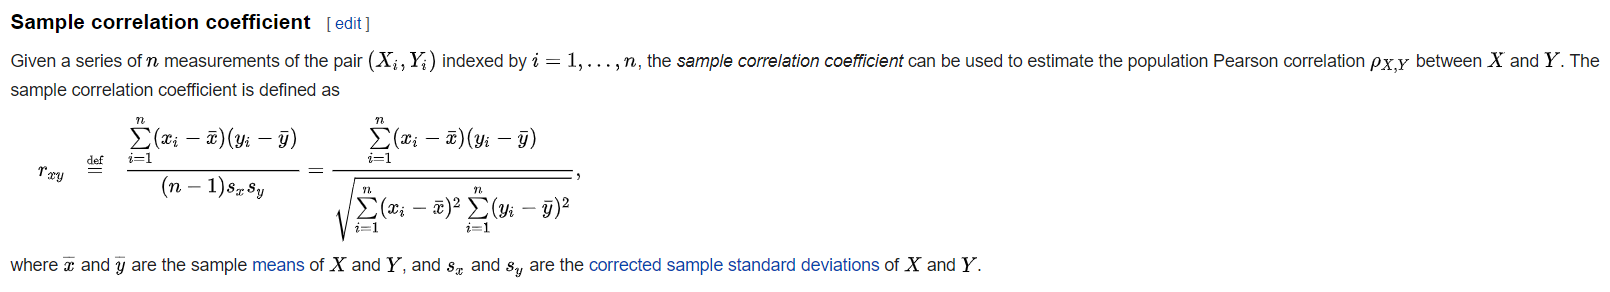

In [1]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.4)  
plt.figure(figsize=(12,7))
sns.heatmap(dfc_lags.corr(), annot=True, cmap='RdYlGn', linewidths=0.1)
plt.tight_layout()
#plt.savefig('CorrM_with_3lags.png', dpi=300)

NameError: name 'sns' is not defined

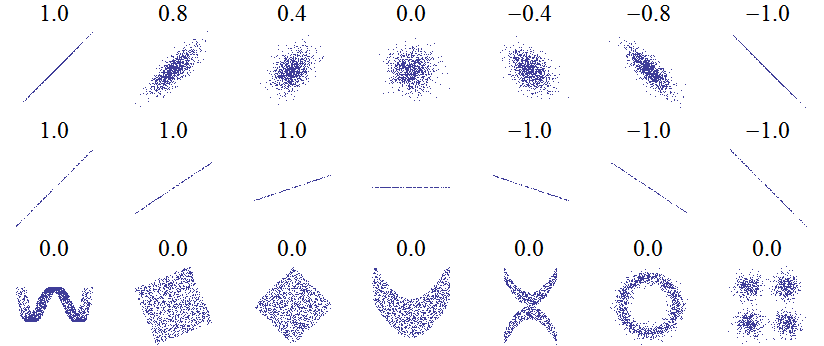

### Matrix for 24 Lags

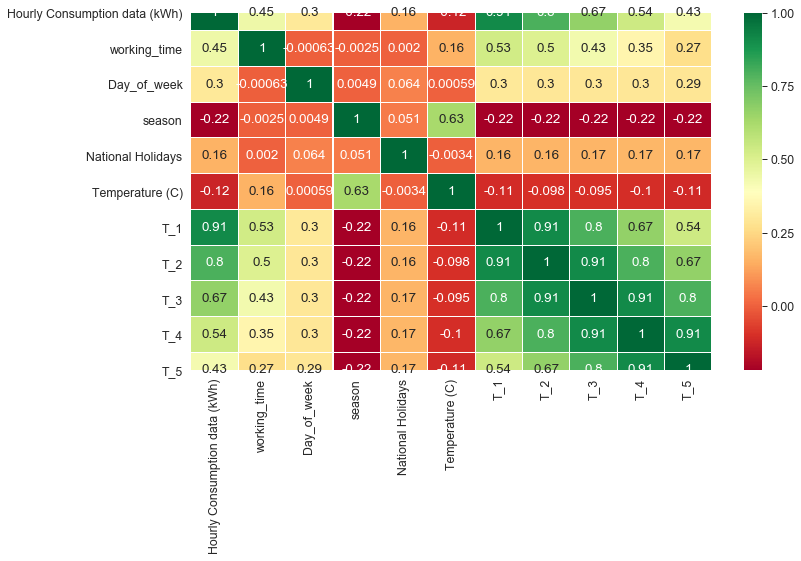

In [70]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.4)  
plt.figure(figsize=(12,8))
sns.heatmap(dfc_lags6.corr(), annot=True, cmap='RdYlGn', linewidths=0.1)
plt.tight_layout()
#plt.savefig('CorrM_with_5lags.png', dpi=300)

## Time lags show more corelation and hence will be used as in put features

## Time lags help change the series from Un supervised to Supervised for Modeling

In [72]:
df_inputs=df1[['Hourly Consumption data (kWh)','working_time','Day_of_week','season','National Holidays','Temperature (C)']]
dfc_inputs = df_inputs

In [94]:
for obs in range(1,4):
    dfc_inputs["T_" + str(obs)] = dfc_inputs['Hourly Consumption data (kWh)'].shift(obs)
dfc_inputs.dropna(inplace=True)
dfc_inputs.head()  

,Hourly Consumption data (kWh),working_time,Day_of_week,season,National Holidays,Temperature (C),T_1,T_2,T_3,T_4,T_5
Date_time,,,,,,,,,,,
2017-04-01 11:00:00,8.86,1,0,2,1,13.6,9.53,9.08,9.30,10.07,23.81
2017-04-01 12:00:00,7.06,1,0,2,1,15.0,8.86,9.53,9.08,9.30,10.07
2017-04-01 13:00:00,8.92,1,0,2,1,13.9,7.06,8.86,9.53,9.08,9.30
2017-04-01 14:00:00,8.54,1,0,2,1,13.5,8.92,7.06,8.86,9.53,9.08
2017-04-01 15:00:00,7.74,1,0,2,1,13.6,8.54,8.92,7.06,8.86,9.53


In [74]:
dfc_inputs2 = df_inputs

for obs in range(1,6):
    dfc_inputs2["T_" + str(obs)] = dfc_inputs['Hourly Consumption data (kWh)'].shift(obs)
dfc_inputs2.dropna(inplace=True)
dfc_inputs2.head()  

,Hourly Consumption data (kWh),working_time,Day_of_week,season,National Holidays,Temperature (C),T_1,T_2,T_3,T_4,T_5
Date_time,,,,,,,,,,,
2017-04-01 08:00:00,9.30,1,0,2,1,9.9,10.07,23.81,10.84,2.58,2.56
2017-04-01 09:00:00,9.08,1,0,2,1,12.3,9.30,10.07,23.81,10.84,2.58
2017-04-01 10:00:00,9.53,1,0,2,1,13.2,9.08,9.30,10.07,23.81,10.84
2017-04-01 11:00:00,8.86,1,0,2,1,13.6,9.53,9.08,9.30,10.07,23.81
2017-04-01 12:00:00,7.06,1,0,2,1,15.0,8.86,9.53,9.08,9.30,10.07


# Train Validation Test Split

In [95]:
# Define training, validation and testing periods
train_start = '2017-04-01'
train_end = '2018-03-1'
validation_start = '2018-03-2'    # last month used for both validation and testing
validation_end = '2018-03-24'
test_start = '2018-03-25'
test_end = '2018-03-31'

## Split using 3 Lags

In [139]:
# Split up into training, validation and testing sets

X_train = dfc_inputs[train_start:train_end]
del X_train['Hourly Consumption data (kWh)']  # delete the y labels

y_train = dfc_inputs['Hourly Consumption data (kWh)'][train_start:train_end]

X_val = dfc_inputs[validation_start:validation_end]
del X_val['Hourly Consumption data (kWh)']

y_val = dfc_inputs['Hourly Consumption data (kWh)'][validation_start:validation_end]

X_test = dfc_inputs[test_start:test_end]
del X_test['Hourly Consumption data (kWh)']

y_test = dfc_inputs['Hourly Consumption data (kWh)'][test_start:test_end]

## Split using 5 Lags

In [104]:
# Split up into training, validation and testing sets

X_train = dfc_inputs2[train_start:train_end]
del X_train['Hourly Consumption data (kWh)']  # delete the y labels

y_train = dfc_inputs2['Hourly Consumption data (kWh)'][train_start:train_end]

X_val = dfc_inputs2[validation_start:validation_end]
del X_val['Hourly Consumption data (kWh)']

y_val = dfc_inputs2['Hourly Consumption data (kWh)'][validation_start:validation_end]

X_test = dfc_inputs2[test_start:test_end]
del X_test['Hourly Consumption data (kWh)']

y_test = dfc_inputs2['Hourly Consumption data (kWh)'][test_start:test_end]

In [105]:
print ('Number of observations in the Training set:', len(X_train))
print ('Percentage of data in Training set:', len(X_train)/len(dfc_inputs)*100)
print ('Number of observations in the Validation set: ', len(X_val))
print ('Percentage of data in Validation set:', len(X_val)/len(dfc_inputs)*100)
print ('Number of observations in the Test set: ', len(X_test))
print ('Percentage of data in Test set:', len(X_test)/len(dfc_inputs)*100)

Number of observations in the Training set: 8030
Percentage of data in Training set: 91.78191793347811
Number of observations in the Validation set:  552
Percentage of data in Validation set: 6.309292490570351
Number of observations in the Test set:  167
Percentage of data in Test set: 1.9087895759515374


In [106]:
def MAPError(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((np.abs(y_true - y_pred)) / (y_true)) * 100

## Benchmark Model as Linear regression

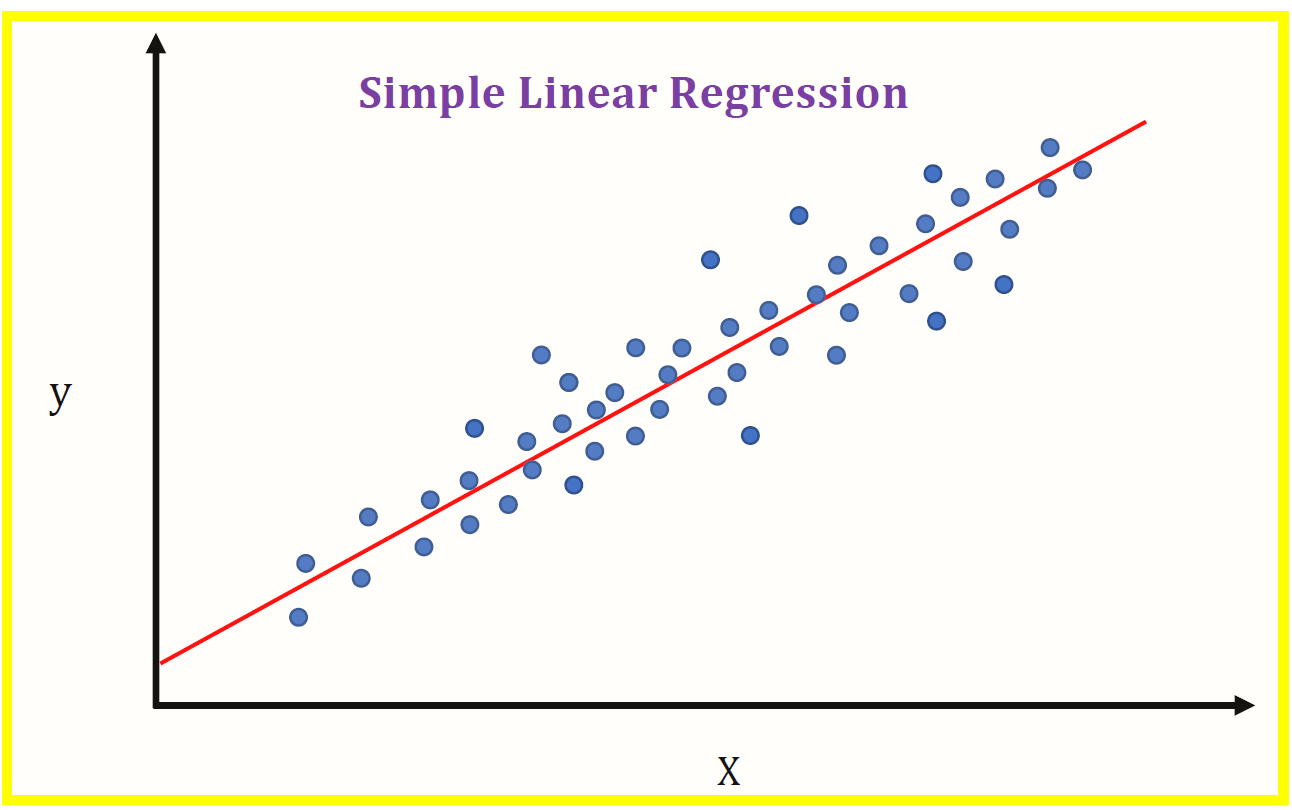

In [107]:
# Initialize and fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# R^2 (coefficient of determination) regression score function
# Mean squared error regression loss

benchmark_model = LinearRegression() #object of class LinearRegression

benchmark_model.fit(X_train, y_train) #Fit object to training set

train_pred = benchmark_model.predict(X_train)
y_pred = benchmark_model.predict(X_val)

print("r2_score on Training data : {:.2f}%".format(benchmark_model.score(X_train, y_train) * 100))
print("r2_score on Validation data : {:.2f}%".format(benchmark_model.score(X_val, y_val) * 100))


print(" Train RMSE : {:.6f}".format(np.sqrt(np.mean((y_train - train_pred)**2))))
print(" Validation RMSE : {:.6f}".format(np.sqrt(np.mean((y_val - y_pred)**2))))


mae_train = mean_absolute_error(y_train, train_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f' Train MAE: {mae_train}')
print(f' Validation MAE: {mae}')

mape_train = MAPError(y_train, train_pred)
mape = MAPError(y_val, y_pred)

print(f' Train MAPE: {mape_train}')
print(f' Validation MAPE: {mape}')

r2_score on Training data : 85.69%
r2_score on Validation data : 76.98%
 Train RMSE : 3.417822
 Validation RMSE : 4.156554
 Train MAE: 1.9042739252179326
 Validation MAE: 2.6004232174994937
 Train MAPE: inf
 Validation MAPE: 32.75371564602502


C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


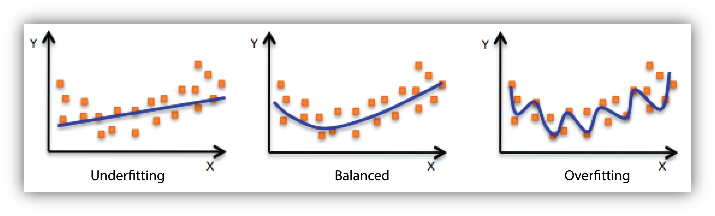

In [116]:
#import xgboost

In [117]:
from xgboost import XGBRegressor

# ML models

1. Ridge Regression
2. k-Nearest Neighbors
3. Random Forest Regressor
4. GradientBoostingRegresso
5. ExtraTreesRegressor
6. Neural Networks

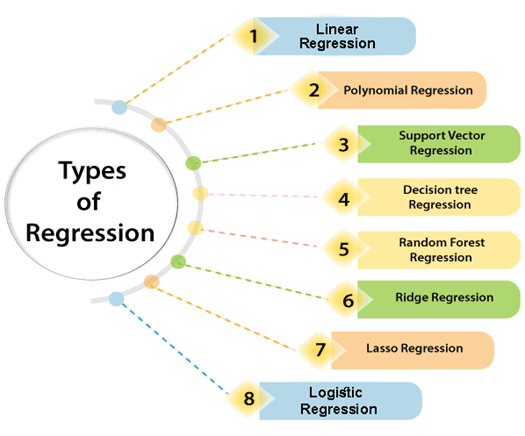

In [108]:
# Function to fit the regressor and record performance metrics
def pipeline(reg, X_train, y_train, X_val, y_val, **kwargs):
    
    # Dictionary to hold properties of Models
    reg_props = {}
    
    # Initialize and fit the regressor, and time taken
    regressor = reg(**kwargs)
   
    regressor.fit(X_train, y_train)
    
    
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    #reg_props["train_time"] = end - start
    reg_props["R2 train_score"] = regressor.score(X_train, y_train)
    reg_props["R2 val_score"] = regressor.score(X_val, y_val)
    reg_props["rmse"] = np.sqrt(mean_squared_error(y_val, regressor.predict(X_val)))
    reg_props["MAE"] = mean_absolute_error(y_val, regressor.predict(X_val))
    reg_props["MAPE"] = MAPError(y_val, regressor.predict(X_val))
    
    return reg_props

In [118]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
#from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
        ExtraTreesRegressor,
        SVR,
        XGBRegressor,
            ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train, y_train, X_val, y_val)
        props.append(properites)
        
    return props

In [ ]:
# Mean Absolute Deviation MAD: The average of the absolute values of the devition between the actual and forecast. The absolute error is the absolute value of the difference between the forecasted value and the actual value. MAE tells us how big of an error we can expect from the forecast on average.
#The MAPE (Mean Absolute Percent Error) measures the size of the error in percentage terms. MAPE allows us to compare forecasts of different series in different scales.

In [119]:
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    #train_times = [prop["train_time"] for pro
    #properties]
    train_scores = [prop["R2 train_score"] for prop in properties]
    val_scores = [prop["R2 val_score"] for prop in properties]
    val_rmse = [prop["rmse"] for prop in properties]
    val_mae = [prop["MAE"] for prop in properties]
    val_mape =[prop["MAPE"] for prop in properties]
        
    # Create a DataFrame from these properties
    df_prop = pd.DataFrame(index=names, 
                    data = {
                            #"Training Times": train_times,
                            "Train Scores": train_scores,
                            "val Scores": val_scores,
                            "RMSE": val_rmse,
                            "MAE":val_mae,
                            "MAPE":val_mape
                      }
                  )
    
    return df_prop

# Obain the properties in a structured DataFrame after executing the pipeline
properties = get_properties()

C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled featu

In [120]:
# Append the peoperties of Linear Rgression Benchmark model to the DataFrame
# Storing the properties of Selected models

properties = pd.concat(
    [properties,
    pd.Series(
    {
        "Name": "Linear Regression (Benchmark)",
        "RMSE": np.sqrt(mean_squared_error(y_val, benchmark_model.predict(X_val))),
        "MAE": mean_absolute_error(y_val, benchmark_model.predict(X_val)),
        "MAPE": MAPError(y_val, benchmark_model.predict(X_val)),
        "Train Scores": benchmark_model.score(X_train, y_train),
        "val Scores" :benchmark_model.score(X_val, y_val),
        #"Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties

C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,MAE,MAPE,RMSE,Train Scores,val Scores
Ridge,2.60038,32.7522,4.15658,0.856946,0.769842
KNeighborsRegressor,2.23303,27.4529,3.62138,0.929937,0.825296
RandomForestRegressor,2.10275,25.6549,3.36731,0.979883,0.848949
GradientBoostingRegressor,2.26681,27.8307,3.55895,0.901915,0.831267
MLPRegressor,2.29365,29.9444,3.57218,0.895507,0.83001
ExtraTreesRegressor,2.06176,24.9786,3.30105,1,0.854836
SVR,3.89868,48.0956,5.92673,0.623481,0.532064
XGBRegressor,2.25924,28.6667,3.4753,0.981408,0.839106
Linear Regression (Benchmark),2.60042,32.7537,4.15655,0.856946,0.769844


C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


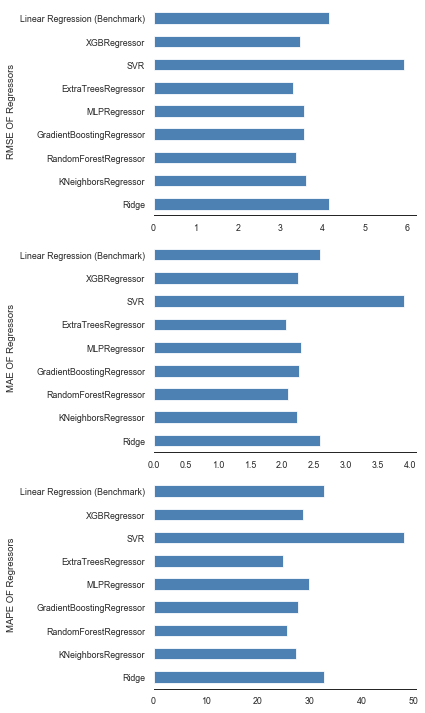

In [124]:
# Plot to compare thePerformance of Algorithms
sns.set_context("paper")
plt.figure(figsize=(6,10))
plt.subplot(3,1,1)
plt.ylabel("RMSE OF Regressors")
properties["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(3,1,2)
plt.ylabel("MAE OF Regressors")
properties["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(3,1,3)
plt.ylabel("MAPE OF Regressors")
properties["MAPE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

#plt.savefig('RMSE_MAE_ML.png', dpi=300, frameon=False) 


C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


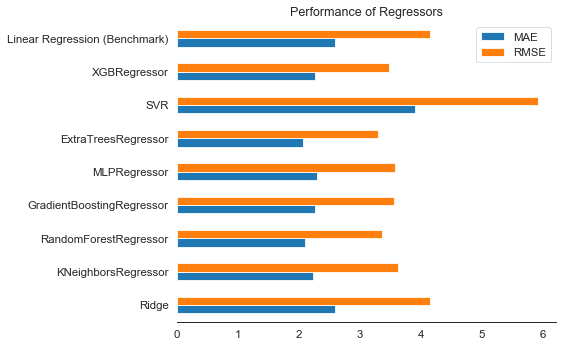

In [122]:
# Plot to compare the performance of Models on both datasets
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  

ax= properties[["MAE", "RMSE"]].plot(kind="barh", title="Performance of Regressors", figsize=(8, 5))
sns.despine(left=True);
plt.tight_layout() 
#plt.savefig('New2_compareML.png', dpi=300, frameon=False) 
plt.show()

# XGBOOST 

# Make plots for all models on Validation set

In [134]:
from sklearn.model_selection import GridSearchCV   # Applys different parameters and selects the best for optmization

reg = XGBRegressor()

reg_cv = GridSearchCV(reg, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)
reg_cv.fit(X_train, y_train)
print (reg_cv.best_params_, reg_cv.best_score_)

C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'max_depth': 4, 'n_estimators': 50} 0.785680428142303


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.9s finished


In [135]:
reg = XGBRegressor(**reg_cv.best_params_)

reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=50, n_jobs=8, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [140]:
xgb_pred = reg.predict(X_val)

In [144]:
xgb_pred.shape

(552,)

In [145]:

# calculate RMSE
xgb_rmse_val = np.sqrt(mean_squared_error(y_val, xgb_pred))
print('XGB Validation RMSE: %.6f' % xgb_rmse_val)

XGB Validation RMSE: 3.452192


In [168]:
y_val1 = pd.DataFrame(y_val)      # y_val has datetime. Combine with xgb_pred that doest have. 

In [169]:
y_val1.head()

,Hourly Consumption data (kWh)
Date_time,
2018-03-02 00:59:59.998,2.71
2018-03-02 01:59:59.998,2.75
2018-03-02 02:59:59.998,2.72
2018-03-02 03:59:59.998,2.75
2018-03-02 04:59:59.998,11.22


In [170]:
y_val1['Validation Forecast'] = xgb_pred

y_val1.head()

,Hourly Consumption data (kWh),Validation Forecast
Date_time,,
2018-03-02 00:59:59.998,2.71,3.478522
2018-03-02 01:59:59.998,2.75,3.478522
2018-03-02 02:59:59.998,2.72,4.585335
2018-03-02 03:59:59.998,2.75,8.183072
2018-03-02 04:59:59.998,11.22,5.377559


<Figure size 432x288 with 0 Axes>

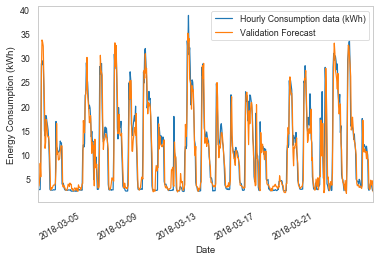

In [175]:
# plot 
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure()

y_val1.plot(figsize=(6,4))

plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
#plt.legend()
plt.savefig('xgb_forecast.png',dpi=300)
plt.show()

## Artificial Neural Networks

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

In [ ]:
values = df2.values
# integer encode direction

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

In [ ]:
 #split into train and test sets
values = reframed.values
n_train_hours = (1656)
train = values[:n_train_hours, :]     #    all rows upto n_train_hours index and all columns
test = values[n_train_hours:, :]      #   from row n_train_hours up last and all columns


In [ ]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# We can try different ANNs and architectures

In [ ]:
# design network
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(Dense(192, activation='relu'))
#model.add(Dense(96, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=24, validation_data=(test_X, test_y), verbose=1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=30)], shuffle=False)

model.summary()

In [ ]:
xhat = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat)
inv_xhat = inv_xhat[:,0]
# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

In [ ]:
rmse_train = sqrt(mean_squared_error(inv_x, inv_xhat))
print('Train RMSE: %.3f' % rmse_train)

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
# calculate RMSE
rmse_test = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse_test)

In [ ]:
# plot 
pyplot.figure(figsize=(30,12))
pyplot.plot(inv_yhat, label ="forecast")
pyplot.plot(inv_y, label ="actual")
pyplot.xlabel('Timestamp')
pyplot.ylabel('Energy_consumption')
pyplot.legend()
pyplot.savefig('try_8_forecast.png')
pyplot.show()

In [ ]:
# plot history
%matplotlib inline
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.savefig('try_8_loss.png')
#pyplot.show()

## WaveNet-CNN

In [247]:
df_wave = df.loc[:,['Hourly Consumption data (kWh)']]

In [248]:
df_wave.head()

,Hourly Consumption data (kWh)
Date_time,
2017-04-01 00:00:00,2.52
2017-04-01 01:00:00,2.51
2017-04-01 02:00:00,2.48
2017-04-01 03:00:00,2.56
2017-04-01 04:00:00,2.58


In [249]:
df_wave.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-04-01 00:00:00 to 2018-03-31 22:59:59.998000
Data columns (total 1 columns):
Hourly Consumption data (kWh)    8760 non-null float64
dtypes: float64(1)
memory usage: 136.9 KB


In [250]:
df_wave = df_wave.T.squeeze()  # change dataframe to series using Transpose
type(df_wave)

pandas.core.series.Series

In [251]:
series = df_wave
series.shape

(8760,)

In [252]:
def seq2seq_window_dataset(series, window_size, batch_size=32,
                           shuffle_buffer=3000):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [253]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [254]:
split_time = (8760-744)
#time_train = Date_Time[:split_time]
x_train = series[:split_time]
#time_valid = Date_Time[split_time:]
x_valid = series[split_time:]

In [255]:
import tensorflow as tf
keras = tf.keras

In [256]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 168
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=48)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=48)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
optimizer = keras.optimizers.Adam(lr=3e-4)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint_wavenet.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=20)
history = model.fit(train_set, epochs=60,
                    validation_data=valid_set,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/60
164/164 [==============================] - 23s 142ms/step - loss: 3.5192 - mae: 3.9742 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 2/60
164/164 [==============================] - 16s 98ms/step - loss: 1.1548 - mae: 1.5364 - val_loss: 1.6453 - val_mae: 2.0376
Epoch 3/60
164/164 [==============================] - 16s 98ms/step - loss: 1.0105 - mae: 1.3805 - val_loss: 1.5239 - val_mae: 1.9133
Epoch 4/60
164/164 [==============================] - 16s 95ms/step - loss: 0.9363 - mae: 1.2995 - val_loss: 1.4962 - val_mae: 1.8801
Epoch 5/60
164/164 [==============================] - 17s 102ms/step - loss: 0.9034 - mae: 1.2582 - val_loss: 1.4726 - val_mae: 1.8537
Epoch 6/60
164/164 [==============================] - 16s 97ms/step - loss: 0.8779 - mae: 1.2258 - val_loss: 1.4699 - val_mae: 1.8502
Epoch 7/60
164/164 [==============================] - 18s 109ms/step - loss: 0.8499 - mae: 1.1971 - val_loss: 1.4473 - val_mae: 1.8229
Epoch 8/60
164/164 [==============================]

In [258]:
model = keras.models.load_model("my_checkpoint_wavenet.h5")

In [397]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 1)           3

In [259]:
#window_size = 240
cnn_forecast = model_forecast(model, series[:,  np.newaxis], window_size)
cnn_forecast = cnn_forecast[split_time - window_size:-1, -1, 0]

In [260]:
type(cnn_forecast)
type(x_valid)

pandas.core.series.Series

In [261]:
x_valid = pd.DataFrame(x_valid)

In [262]:
x_valid['forecast'] = cnn_forecast  # add forecast data for comparison

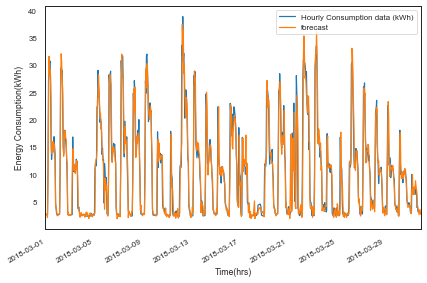

In [268]:
sns.set_style('white')
sns.set_context("paper", font_scale=0.9) 

x_valid.plot(figsize=(6,4))
plt.tight_layout()
plt.xlabel('Time(hrs)')
plt.ylabel('Energy Consumption(kWh)')
#plt.show()
#plt.savefig('ieee_cnn_march.png', dpi=300)

In [279]:
x_valid.head(24)

,Hourly Consumption data (kWh),forecast
Date_time,,
2018-02-28 23:59:59.998,2.69,2.650163
2018-03-01 00:59:59.998,2.60,2.709572
2018-03-01 01:59:59.998,2.76,2.714895
2018-03-01 02:59:59.998,2.75,2.738739
2018-03-01 03:59:59.998,2.67,2.125265
2018-03-01 04:59:59.998,11.22,9.322376
2018-03-01 05:59:59.998,27.25,22.435127
2018-03-01 06:59:59.998,28.44,31.605438
2018-03-01 07:59:59.998,30.28,28.212883


### Model Evaluation

In [271]:
Actual = x_valid['Hourly Consumption data (kWh)'].transpose()
Forecast = x_valid['forecast'].transpose()

In [274]:
Actual.shape

(744,)

In [275]:
Forecast.shape

(744,)

In [273]:
print(" Test RMSE : {:.4f}".format(np.sqrt(np.mean((Actual - Forecast)**2))))
mae = mean_absolute_error(Actual, Forecast)
print(f' Test MAE: {mae}')
mape=MAPError(Actual, Forecast)
print(f' Test MAPE: {mape}')

 Test RMSE : 2.8758
 Test MAE: 1.612474498223233
 Test MAPE: 18.890251472982417


In [303]:
print(" Val RMSE : {:.4f}".format(np.sqrt(np.mean((Actual[:24] - Forecast[:24])**2))))
mae = mean_absolute_error(Actual[:24], Forecast[:24])
print(f' Val MAE: {mae}')
mape=MAPError(Actual[:24], Forecast[:24])
print(f' Val MAPE: {mape}')

 Val RMSE : 2.0575
 Val MAE: 1.3762102472782125
 Val MAPE: 9.711609861934699


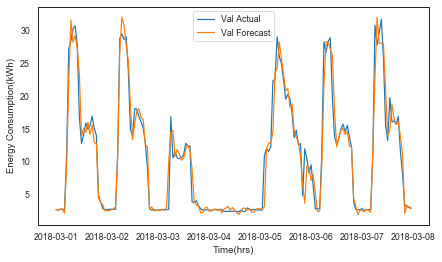

In [406]:
sns.set_style('white')
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(7,4))
#x_valid.plot(figsize=(6,4))
plt.plot(Actual[:24*7], label = "Val Actual")
plt.plot(Forecast[:24*7], label = "Val Forecast")

#plt.tight_layout()
plt.xlabel('Time(hrs)')
plt.ylabel('Energy Consumption(kWh)')
plt.legend(loc='best');
#plt.show()
plt.savefig('ieee_cnn_week1.png', dpi=300)

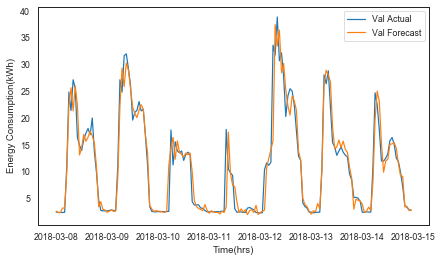

In [405]:
sns.set_style('white')
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(7,4))
#x_valid.plot(figsize=(6,4))
plt.plot(Actual[168:24*7*2], label = "Val Actual")
plt.plot(Forecast[168:24*7*2], label = "Val Forecast")

#plt.tight_layout()
plt.xlabel('Time(hrs)')
plt.ylabel('Energy Consumption(kWh)')
plt.legend(loc='upper right');
#plt.show()
plt.savefig('ieee_cnn_week2.png', dpi = 300)

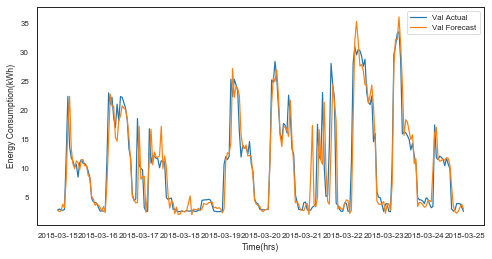

In [408]:
sns.set_style('white')
sns.set_context("paper", font_scale=0.9) 
plt.figure(figsize=(8,4))
#x_valid.plot(figsize=(6,4))
plt.plot(Actual[24*7*2:(24*7*3+72)], label = "Val Actual")
plt.plot(Forecast[24*7*2:(24*7*3+72)], label = "Val Forecast")

#plt.tight_layout()
plt.xlabel('Time(hrs)')
plt.ylabel('Energy Consumption(kWh)')
plt.legend(loc='best');
#plt.show()
plt.savefig('ieee_cnn_week3.png', dpi=300)

## Test data

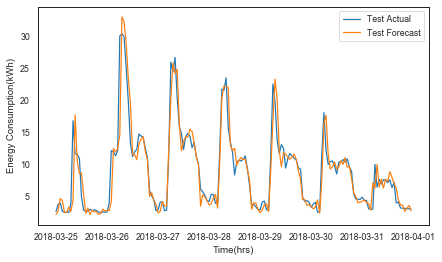

In [409]:
sns.set_style('white')
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(7,4))
#x_valid.plot(figsize=(6,4))
plt.plot(Actual[24*7*3+72:], label = "Test Actual")
plt.plot(Forecast[24*7*3+72:], label = "Test Forecast")

#plt.tight_layout()
plt.xlabel('Time(hrs)')
plt.ylabel('Energy Consumption(kWh)')
plt.legend(loc='upper right');
#plt.show()
plt.savefig('ieee_cnn_week4.png', dpi = 300)

In [304]:
print(" Test RMSE : {:.4f}".format(np.sqrt(np.mean((Actual[24*7*3+72:] - Forecast[24*7*3+72:])**2))))
mae = mean_absolute_error(Actual[24*7*3+72:], Forecast[24*7*3+72:])
print(f' Test MAE: {mae}')
mape=MAPError(Actual[24*7*3+72:], Forecast[24*7*3+72:])
print(f' Test MAPE: {mape}')

 Test RMSE : 2.4781
 Test MAE: 1.386975252741859
 Test MAPE: 16.82624700479762


## LSTM and CNN

In [306]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 168
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=48)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=48)

model = keras.models.Sequential([
  keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200)
])
optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint_LSTM_CNN.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=200)
model.fit(train_set, epochs=60,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint])

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [ ]:
model = keras.models.load_model("my_checkpoint_LSTM_CNN.h5")

In [ ]:
rnn_forecast = model_forecast(model, series[:,  np.newaxis], window_size)  # np.newaxis adds another dimension  
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]   # also np.hstack([np.expand_dims(np.array()) ]

In [ ]:
rnn_forecast = pd.Series(rnn_forecast)
type(rnn_forecast)

In [ ]:
x_valid = pd.DataFrame(x_valid)

In [ ]:
x_valid['forecast'] = rnn_forecast

## Evaluation

In [352]:
mae_test = {'MLPRegressor (Baseline)':2.1885, 'DNN':2.6631, 'LSTM':1.1120, '1D CNN & LSTM':0.8244, 'WaveNet-1D CNN':0.6377}
rmse_test = {'MLPRegressor (Baseline)':3.5161, 'DNN':3.8791, 'LSTM':2.5143, '1D CNN & LSTM':1.9821, 'WaveNet-1D CNN':1.3863}

In [390]:
mae_test1 = pd.DataFrame.from_dict(mae_test, orient='index',columns=['mae test'])
rmse_test1 = pd.DataFrame.from_dict(rmse_test, orient='index', columns = ['rmse test'])

In [391]:
evaln = pd.concat([mae_test1, rmse_test1], axis=1)

In [385]:
#evaln.reset_index(inplace = True)

In [392]:
evaln.head()

,mae test,rmse test
MLPRegressor (Baseline),2.1885,3.5161
DNN,2.6631,3.8791
LSTM,1.1120,2.5143
1D CNN & LSTM,0.8244,1.9821
WaveNet-1D CNN,0.6377,1.3863


C:\Users\Abraham\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  if __name__ == '__main__':


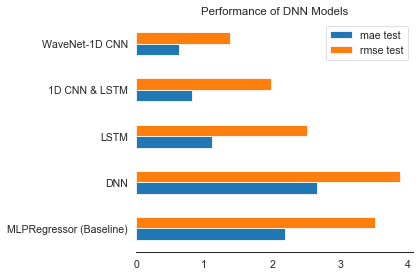

In [395]:
# Plot to compare the performance of Models on both datasets
sns.set_style('white')
sns.set_context("paper", font_scale=1.2)  

evaln.plot(kind="barh", title="Performance of DNN Models", figsize=(6, 4))
sns.despine(left=True);
plt.tight_layout() 
plt.legend()
plt.savefig('compareDNN.png', dpi=300, frameon=False) 
plt.show()

In [ ]:
keys = a_dictionary. keys()
values = a_dictionary. values()
plt. bar(keys, values)

### Use plotly to show demand  with dropdown menu for months

In [46]:
df3.reset_index(inplace = True)

In [51]:
from ipywidgets import interactive
import plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import display

#yr = [i for i in df3.DateTime.year ]
#Year = list(set(yr)) # remove duplicates
Year = pd.to_datetime(2016,2017,2018,2019,2010)
#print (year)

#grouped = df3.groupby([df3.index.month])


def plot_by_year(Year):
    data = [go.Scatter(x=df3.DateTime(year = 2016), y=df3['Tokyo_AEP_MW'] , name= "Tokyo AEP (MW)", line = dict(color = '#054AFB'), opacity =0.8)]
    layout = dict(title = "Power Consumption for Tokyo_AEP in MW", showlegend = True )
    fig = dict(data = data, layout = layout)
    iplot(fig)


interactive(plot_by_year, Year=year)

AssertionError: 

In [ ]:
# boolean indexing
#df2 = df[df['column']=>something]

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37224 entries, 0 to 37223
Data columns (total 2 columns):
DateTime        37224 non-null datetime64[ns]
Tokyo_AEP_MW    37224 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 581.7 KB
